In [2]:
# Jeff's data Analysis

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from scipy import stats

# Data files
library_covid_data = "../Data/Merged_Library_Covid_outer.csv"

# Read the mouse data and the study results
chi_library_covid = pd.read_csv(library_covid_data, dtype={'JANUARY': float, 'YTD': float, 'YEAR': object, 'ZIP': object})

# Display the data table for preview
chi_library_covid

,Unnamed: 0,ADDRESS,CITY,ZIP,JANUARY,FEBRUARY,MARCH,APRIL,MAY,JUNE,...,AUGUST,SEPTEMBER,OCTOBER,NOVEMBER,DECEMBER,YTD,TYPE,YEAR,LAT,LNG
0,0,3401 W. Foster Ave.,Chicago,60625,8214.0,7614.0,8460.0,7414.0,7044.0,7970.0,...,9069.0,7053.0,8012.0,6571.0,5924.0,93009.0,Circulation,2019,41.971155,-87.701816
1,1,13281 S. Corliss Ave.,Chicago,60827,378.0,326.0,332.0,270.0,320.0,325.0,...,229.0,234.0,377.0,369.0,500.0,4014.0,Circulation,2019,41.650765,-87.633087
2,2,5055 S. Archer Ave.,Chicago,60632,5365.0,5019.0,5417.0,5349.0,4833.0,4627.0,...,4793.0,4537.0,5263.0,4051.0,3415.0,58025.0,Circulation,2019,41.810038,-87.711251
3,3,5615 W. Race Ave.,Chicago,60644,215.0,590.0,706.0,736.0,806.0,983.0,...,1236.0,1193.0,1361.0,1286.0,1082.0,11328.0,Circulation,2019,41.881113,-87.756863
4,4,6100 W. Irving Park Rd.,Chicago,60634,9678.0,9764.0,10845.0,10541.0,9763.0,11442.0,...,11063.0,9379.0,9932.0,8567.0,6492.0,119100.0,Circulation,2019,41.944967,-87.797373
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
833,1018,NaN,NaN,60660,NaN,NaN,245.0,779.0,1646.0,2962.0,...,4037.0,3626.0,4880.0,8846.0,5511.0,35552.0,Tests,2020,41.991062,-87.666362
834,1019,NaN,NaN,60661,NaN,NaN,67.0,111.0,303.0,473.0,...,1119.0,1030.0,1595.0,2620.0,1938.0,10100.0,Tests,2020,41.882786,-87.644283
835,1020,NaN,NaN,60666,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Tests,2020,41.979511,-87.896371
836,1021,NaN,NaN,60707,NaN,NaN,117.0,601.0,1278.0,901.0,...,205.0,0.0,0.0,0.0,0.0,4389.0,Tests,2020,41.921777,-87.808283


In [4]:
chi_library_covid.dtypes

Unnamed: 0      int64
ADDRESS        object
CITY           object
ZIP            object
JANUARY       float64
FEBRUARY      float64
MARCH         float64
APRIL         float64
MAY           float64
JUNE          float64
JULY          float64
AUGUST        float64
SEPTEMBER     float64
OCTOBER       float64
NOVEMBER      float64
DECEMBER      float64
YTD           float64
TYPE           object
YEAR           object
LAT           float64
LNG           float64
dtype: object

In [5]:
chi_library_covid_2019 = chi_library_covid.loc[chi_library_covid['YEAR'] == "2019"]
chi_library_covid_2020 = chi_library_covid.loc[chi_library_covid['YEAR'] == "2020"]
chi_library_covid_2021 = chi_library_covid.loc[chi_library_covid['YEAR'] == "2021"]

In [6]:
# len(chi_library_covid_2019)
# len(chi_library_covid_2020)
# len(chi_library_covid_2021)

In [7]:
chi_library_covid_2019.head()

,Unnamed: 0,ADDRESS,CITY,ZIP,JANUARY,FEBRUARY,MARCH,APRIL,MAY,JUNE,...,AUGUST,SEPTEMBER,OCTOBER,NOVEMBER,DECEMBER,YTD,TYPE,YEAR,LAT,LNG
0,0,3401 W. Foster Ave.,Chicago,60625,8214.0,7614.0,8460.0,7414.0,7044.0,7970.0,...,9069.0,7053.0,8012.0,6571.0,5924.0,93009.0,Circulation,2019,41.971155,-87.701816
1,1,13281 S. Corliss Ave.,Chicago,60827,378.0,326.0,332.0,270.0,320.0,325.0,...,229.0,234.0,377.0,369.0,500.0,4014.0,Circulation,2019,41.650765,-87.633087
2,2,5055 S. Archer Ave.,Chicago,60632,5365.0,5019.0,5417.0,5349.0,4833.0,4627.0,...,4793.0,4537.0,5263.0,4051.0,3415.0,58025.0,Circulation,2019,41.810038,-87.711251
3,3,5615 W. Race Ave.,Chicago,60644,215.0,590.0,706.0,736.0,806.0,983.0,...,1236.0,1193.0,1361.0,1286.0,1082.0,11328.0,Circulation,2019,41.881113,-87.756863
4,4,6100 W. Irving Park Rd.,Chicago,60634,9678.0,9764.0,10845.0,10541.0,9763.0,11442.0,...,11063.0,9379.0,9932.0,8567.0,6492.0,119100.0,Circulation,2019,41.944967,-87.797373


In [8]:
# summary_stats_2019 = chi_library_covid_2019
# agg_func_math = {
#     'YTD':
#     ['mean', 'median', 'var', 'std', 'sem']
# }
# summary_stats_2019.groupby(['TYPE']).agg(agg_func_math).round(2)

In [9]:
# 2019 Summary Data starting with YTD then by month

In [10]:
# https://jamesrledoux.com/code/group-by-aggregate-pandas
summary_stats_2019_ytd = chi_library_covid_2019.groupby(['TYPE']).agg({'YTD': ['mean', 'median', 'var', 'std', 'sem']}).round(2)
summary_stats_2019_ytd.columns = ['Mean', 'Median', 'Variance', 'Standard Deviation', 'SEM']
summary_stats_2019_ytd = summary_stats_2019_ytd.reset_index()
summary_stats_2019_ytd

,TYPE,Mean,Median,Variance,Standard Deviation,SEM
0,Circulation,59075.41,39280.0,6.292804e+09,79327.20,8814.13
1,Visitors,100494.75,74724.5,2.491201e+10,157835.39,17646.53


In [11]:
summary_stats_2019_january = chi_library_covid_2019.groupby(['TYPE']).agg({'JANUARY': ['mean', 'median', 'var', 'std', 'sem']}).round(2)
summary_stats_2019_january.columns = ['Mean', 'Median', 'Variance', 'Standard Deviation', 'SEM']
summary_stats_2019_january = summary_stats_2019_january.reset_index()
summary_stats_2019_january

,TYPE,Mean,Median,Variance,Standard Deviation,SEM
0,Circulation,4712.41,2715.0,4.354170e+07,6598.61,733.18
1,Visitors,7303.70,5235.5,1.329275e+08,11529.42,1289.03


In [12]:
summary_stats_2019_february = chi_library_covid_2019.groupby(['TYPE']).agg({'FEBRUARY': ['mean', 'median', 'var', 'std', 'sem']}).round(2)
summary_stats_2019_february.columns = ['Mean', 'Median', 'Variance', 'Standard Deviation', 'SEM']
summary_stats_2019_february = summary_stats_2019_february.reset_index()
summary_stats_2019_february

,TYPE,Mean,Median,Variance,Standard Deviation,SEM
0,Circulation,4597.10,3106.0,3.932579e+07,6271.03,696.78
1,Visitors,8313.98,6647.0,1.346551e+08,11604.10,1297.38


In [13]:
summary_stats_2019_march = chi_library_covid_2019.groupby(['TYPE']).agg({'MARCH': ['mean', 'median', 'var', 'std', 'sem']}).round(2)
summary_stats_2019_march.columns = ['Mean', 'Median', 'Variance', 'Standard Deviation', 'SEM']
summary_stats_2019_march = summary_stats_2019_march.reset_index()
summary_stats_2019_march

,TYPE,Mean,Median,Variance,Standard Deviation,SEM
0,Circulation,5265.59,3354.0,5.182291e+07,7198.81,799.87
1,Visitors,8989.49,7207.5,1.882815e+08,13721.57,1534.12


In [14]:
summary_stats_2019_april = chi_library_covid_2019.groupby(['TYPE']).agg({'APRIL': ['mean', 'median', 'var', 'std', 'sem']}).round(2)
summary_stats_2019_april.columns = ['Mean', 'Median', 'Variance', 'Standard Deviation', 'SEM']
summary_stats_2019_april = summary_stats_2019_april.reset_index()
summary_stats_2019_april

,TYPE,Mean,Median,Variance,Standard Deviation,SEM
0,Circulation,4959.98,3152.0,4.528424e+07,6729.36,747.71
1,Visitors,8927.94,6599.0,2.150302e+08,14663.91,1639.47


In [15]:
summary_stats_2019_may = chi_library_covid_2019.groupby(['TYPE']).agg({'MAY': ['mean', 'median', 'var', 'std', 'sem']}).round(2)
summary_stats_2019_may.columns = ['Mean', 'Median', 'Variance', 'Standard Deviation', 'SEM']
summary_stats_2019_may = summary_stats_2019_may.reset_index()
summary_stats_2019_may

,TYPE,Mean,Median,Variance,Standard Deviation,SEM
0,Circulation,4728.74,2942.0,4.255893e+07,6523.72,724.86
1,Visitors,8278.91,6332.0,1.728198e+08,13146.09,1469.78


In [16]:
summary_stats_2019_june = chi_library_covid_2019.groupby(['TYPE']).agg({'JUNE': ['mean', 'median', 'var', 'std', 'sem']}).round(2)
summary_stats_2019_june.columns = ['Mean', 'Median', 'Variance', 'Standard Deviation', 'SEM']
summary_stats_2019_june = summary_stats_2019_june.reset_index()
summary_stats_2019_june

,TYPE,Mean,Median,Variance,Standard Deviation,SEM
0,Circulation,5054.40,3189.0,4.544742e+07,6741.47,749.05
1,Visitors,8341.39,6130.5,1.732121e+08,13161.01,1471.45


In [17]:
summary_stats_2019_july = chi_library_covid_2019.groupby(['TYPE']).agg({'JULY': ['mean', 'median', 'var', 'std', 'sem']}).round(2)
summary_stats_2019_july.columns = ['Mean', 'Median', 'Variance', 'Standard Deviation', 'SEM']
summary_stats_2019_july = summary_stats_2019_july.reset_index()
summary_stats_2019_july

,TYPE,Mean,Median,Variance,Standard Deviation,SEM
0,Circulation,5666.57,3633.0,5.295117e+07,7276.76,808.53
1,Visitors,9481.44,7269.0,1.834926e+08,13545.94,1514.48


In [18]:
summary_stats_2019_august = chi_library_covid_2019.groupby(['TYPE']).agg({'AUGUST': ['mean', 'median', 'var', 'std', 'sem']}).round(2)
summary_stats_2019_august.columns = ['Mean', 'Median', 'Variance', 'Standard Deviation', 'SEM']
summary_stats_2019_august = summary_stats_2019_august.reset_index()
summary_stats_2019_august

,TYPE,Mean,Median,Variance,Standard Deviation,SEM
0,Circulation,5537.20,3547.0,5.285459e+07,7270.12,807.79
1,Visitors,9128.36,7013.0,1.739529e+08,13189.12,1474.59


In [19]:
summary_stats_2019_september = chi_library_covid_2019.groupby(['TYPE']).agg({'SEPTEMBER': ['mean', 'median', 'var', 'std', 'sem']}).round(2)
summary_stats_2019_september.columns = ['Mean', 'Median', 'Variance', 'Standard Deviation', 'SEM']
summary_stats_2019_september = summary_stats_2019_september.reset_index()
summary_stats_2019_september

,TYPE,Mean,Median,Variance,Standard Deviation,SEM
0,Circulation,4789.09,3385.0,4.216470e+07,6493.44,721.49
1,Visitors,7963.30,5952.5,1.480688e+08,12168.35,1360.46


In [20]:
summary_stats_2019_october = chi_library_covid_2019.groupby(['TYPE']).agg({'OCTOBER': ['mean', 'median', 'var', 'std', 'sem']}).round(2)
summary_stats_2019_october.columns = ['Mean', 'Median', 'Variance', 'Standard Deviation', 'SEM']
summary_stats_2019_october = summary_stats_2019_october.reset_index()
summary_stats_2019_october

,TYPE,Mean,Median,Variance,Standard Deviation,SEM
0,Circulation,5137.59,3790.0,4.764671e+07,6902.66,766.96
1,Visitors,8893.72,6926.5,2.101539e+08,14496.69,1620.78


In [21]:
summary_stats_2019_november = chi_library_covid_2019.groupby(['TYPE']).agg({'NOVEMBER': ['mean', 'median', 'var', 'std', 'sem']}).round(2)
summary_stats_2019_november.columns = ['Mean', 'Median', 'Variance', 'Standard Deviation', 'SEM']
summary_stats_2019_november = summary_stats_2019_november.reset_index()
summary_stats_2019_november

,TYPE,Mean,Median,Variance,Standard Deviation,SEM
0,Circulation,4545.59,3223.0,3.802354e+07,6166.32,685.15
1,Visitors,7486.34,5902.5,1.390711e+08,11792.84,1318.48


In [22]:
summary_stats_2019_december = chi_library_covid_2019.groupby(['TYPE']).agg({'DECEMBER': ['mean', 'median', 'var', 'std', 'sem']}).round(2)
summary_stats_2019_december.columns = ['Mean', 'Median', 'Variance', 'Standard Deviation', 'SEM']
summary_stats_2019_december = summary_stats_2019_december.reset_index()
summary_stats_2019_december

,TYPE,Mean,Median,Variance,Standard Deviation,SEM
0,Circulation,4081.16,2654.0,3.276230e+07,5723.84,635.98
1,Visitors,7386.19,4826.0,2.491704e+08,15785.13,1764.83


In [23]:
# zip_2019_visitors = chi_library_covid_2019.loc[chi_library_covid_2019['TYPE'] == "Visitors"]
# total_visitors_2019 = zip_2019_visitors['YTD'].sum()
# total_visitors_2019

In [24]:
# visitor_analysis_2019 = zip_2019_visitors.groupby(['ZIP']).sum()
# visitor_analysis_2019.head()

In [25]:
# visitor_analysis_2019 = visitor_analysis_2019.reset_index()
# visitor_analysis_2019.head()

In [26]:
# percent_visitors_zip_2019 = (visitor_analysis_2019["YTD"] / total_visitors_2019) * 100
# percent_visitors_zip_2019.head()

In [27]:
# final_percent_visitors_by_zip_2019 = pd.DataFrame({"Percent of Visitors 2019": percent_visitors_by_zip_2019})
# final_percent_visitors_by_zip_2019.head()

In [28]:
# 2020 Summary Data starting with YTD then by month

In [29]:
summary_stats_2020 = chi_library_covid_2020.groupby(['TYPE']).agg({'YTD': ['mean', 'median', 'var', 'std', 'sem']}).round(2)
summary_stats_2020.columns = ['Mean', 'Median', 'Variance', 'Standard Deviation', 'SEM']
summary_stats_2020 = summary_stats_2020.reset_index()
summary_stats_2020

,TYPE,Mean,Median,Variance,Standard Deviation,SEM
0,Cases,3554.47,2733.0,8.556272e+06,2925.11,380.82
1,Circulation,33656.25,19047.0,1.895243e+09,43534.39,4837.15
2,Deaths,74.64,70.0,3.274720e+03,57.23,7.45
3,Tests,40332.31,41243.0,5.806489e+08,24096.66,3137.12
4,Visitors,41459.75,30545.0,4.020040e+09,63403.79,7088.76


In [30]:
summary_stats_2020_january = chi_library_covid_2020.groupby(['TYPE']).agg({'JANUARY': ['mean', 'median', 'var', 'std', 'sem']}).round(2)
summary_stats_2020_january.columns = ['Mean', 'Median', 'Variance', 'Standard Deviation', 'SEM']
summary_stats_2020_january = summary_stats_2020_january.reset_index()
summary_stats_2020_january

,TYPE,Mean,Median,Variance,Standard Deviation,SEM
0,Cases,NaN,NaN,NaN,NaN,NaN
1,Circulation,4766.65,2929.0,4.384517e+07,6621.57,735.73
2,Deaths,NaN,NaN,NaN,NaN,NaN
3,Tests,NaN,NaN,NaN,NaN,NaN
4,Visitors,7510.58,5285.0,1.427145e+08,11946.32,1335.64


In [31]:
summary_stats_2020_february = chi_library_covid_2020.groupby(['TYPE']).agg({'FEBRUARY': ['mean', 'median', 'var', 'std', 'sem']}).round(2)
summary_stats_2020_february.columns = ['Mean', 'Median', 'Variance', 'Standard Deviation', 'SEM']
summary_stats_2020_february = summary_stats_2020_february.reset_index()
summary_stats_2020_february

,TYPE,Mean,Median,Variance,Standard Deviation,SEM
0,Cases,NaN,NaN,NaN,NaN,NaN
1,Circulation,4438.41,2838.0,3.493289e+07,5910.40,656.71
2,Deaths,NaN,NaN,NaN,NaN,NaN
3,Tests,NaN,NaN,NaN,NaN,NaN
4,Visitors,7354.44,5043.0,1.342300e+08,11585.77,1295.33


In [32]:
summary_stats_2020_march = chi_library_covid_2020.groupby(['TYPE']).agg({'MARCH': ['mean', 'median', 'var', 'std', 'sem']}).round(2)
summary_stats_2020_march.columns = ['Mean', 'Median', 'Variance', 'Standard Deviation', 'SEM']
summary_stats_2020_march = summary_stats_2020_march.reset_index()
summary_stats_2020_march

,TYPE,Mean,Median,Variance,Standard Deviation,SEM
0,Cases,101.88,97.0,4569.35,67.60,8.80
1,Circulation,3147.78,1835.0,18132479.65,4258.22,473.14
2,Deaths,2.83,2.0,10.94,3.31,0.43
3,Tests,350.93,365.0,33518.93,183.08,23.84
4,Visitors,5203.10,3540.5,73739431.71,8587.17,960.07


In [33]:
summary_stats_2020_april = chi_library_covid_2020.groupby(['TYPE']).agg({'APRIL': ['mean', 'median', 'var', 'std', 'sem']}).round(2)
summary_stats_2020_april.columns = ['Mean', 'Median', 'Variance', 'Standard Deviation', 'SEM']
summary_stats_2020_april = summary_stats_2020_april.reset_index()
summary_stats_2020_april

,TYPE,Mean,Median,Variance,Standard Deviation,SEM
0,Cases,368.64,282.0,134514.13,366.76,47.75
1,Circulation,3.68,0.0,936.20,30.60,3.40
2,Deaths,17.58,17.0,232.97,15.26,1.99
3,Tests,1226.93,1045.0,686487.89,828.55,107.87
4,Visitors,0.00,0.0,0.00,0.00,0.00


In [34]:
summary_stats_2020_may = chi_library_covid_2020.groupby(['TYPE']).agg({'MAY': ['mean', 'median', 'var', 'std', 'sem']}).round(2)
summary_stats_2020_may.columns = ['Mean', 'Median', 'Variance', 'Standard Deviation', 'SEM']
summary_stats_2020_may = summary_stats_2020_may.reset_index()
summary_stats_2020_may

,TYPE,Mean,Median,Variance,Standard Deviation,SEM
0,Cases,355.93,232.0,172080.93,414.83,54.01
1,Circulation,4.16,0.0,753.89,27.46,3.05
2,Deaths,19.68,16.0,319.98,17.89,2.33
3,Tests,2628.83,2427.0,3307407.76,1818.63,236.77
4,Visitors,0.00,0.0,0.00,0.00,0.00


In [35]:
summary_stats_2020_june = chi_library_covid_2020.groupby(['TYPE']).agg({'JUNE': ['mean', 'median', 'var', 'std', 'sem']}).round(2)
summary_stats_2020_june.columns = ['Mean', 'Median', 'Variance', 'Standard Deviation', 'SEM']
summary_stats_2020_june = summary_stats_2020_june.reset_index()
summary_stats_2020_june

,TYPE,Mean,Median,Variance,Standard Deviation,SEM
0,Cases,92.78,72.0,5738.69,75.75,9.86
1,Circulation,2127.46,1109.0,8017294.18,2831.48,314.61
2,Deaths,5.63,4.0,32.79,5.73,0.75
3,Tests,2658.19,2679.0,2606176.88,1614.37,210.17
4,Visitors,2208.50,1702.0,8688540.81,2947.63,329.56


In [36]:
summary_stats_2020_july = chi_library_covid_2020.groupby(['TYPE']).agg({'JULY': ['mean', 'median', 'var', 'std', 'sem']}).round(2)
summary_stats_2020_july.columns = ['Mean', 'Median', 'Variance', 'Standard Deviation', 'SEM']
summary_stats_2020_july = summary_stats_2020_july.reset_index()
summary_stats_2020_july

,TYPE,Mean,Median,Variance,Standard Deviation,SEM
0,Cases,129.76,104.0,9023.46,94.99,12.37
1,Circulation,3285.53,1686.0,17201649.98,4147.49,460.83
2,Deaths,1.83,1.0,4.76,2.18,0.28
3,Tests,3383.34,3164.0,4381179.43,2093.13,272.50
4,Visitors,3238.62,2494.5,19582869.05,4425.25,494.76


In [37]:
summary_stats_2020_august = chi_library_covid_2020.groupby(['TYPE']).agg({'AUGUST': ['mean', 'median', 'var', 'std', 'sem']}).round(2)
summary_stats_2020_august.columns = ['Mean', 'Median', 'Variance', 'Standard Deviation', 'SEM']
summary_stats_2020_august = summary_stats_2020_august.reset_index()
summary_stats_2020_august

,TYPE,Mean,Median,Variance,Standard Deviation,SEM
0,Cases,198.10,147.0,29433.44,171.56,22.34
1,Circulation,3240.78,1656.0,17004080.62,4123.60,458.18
2,Deaths,1.80,1.0,4.79,2.19,0.28
3,Tests,4490.92,4037.0,7973314.80,2823.71,367.62
4,Visitors,3356.32,2552.5,18754938.07,4330.70,484.19


In [38]:
summary_stats_2020_september = chi_library_covid_2020.groupby(['TYPE']).agg({'SEPTEMBER': ['mean', 'median', 'var', 'std', 'sem']}).round(2)
summary_stats_2020_september.columns = ['Mean', 'Median', 'Variance', 'Standard Deviation', 'SEM']
summary_stats_2020_september = summary_stats_2020_september.reset_index()
summary_stats_2020_september

,TYPE,Mean,Median,Variance,Standard Deviation,SEM
0,Cases,147.31,105.0,15687.49,125.25,16.31
1,Circulation,3306.25,1866.0,17454541.89,4177.86,464.21
2,Deaths,1.41,1.0,3.14,1.77,0.23
3,Tests,3750.49,3732.0,5519725.91,2349.41,305.87
4,Visitors,3439.84,2657.5,27410027.78,5235.46,585.34


In [39]:
summary_stats_2020_october = chi_library_covid_2020.groupby(['TYPE']).agg({'OCTOBER': ['mean', 'median', 'var', 'std', 'sem']}).round(2)
summary_stats_2020_october.columns = ['Mean', 'Median', 'Variance', 'Standard Deviation', 'SEM']
summary_stats_2020_october = summary_stats_2020_october.reset_index()
summary_stats_2020_october

,TYPE,Mean,Median,Variance,Standard Deviation,SEM
0,Cases,439.76,329.0,128994.53,359.16,46.76
1,Circulation,3385.48,1914.0,18675826.80,4321.55,480.17
2,Deaths,2.14,1.0,5.64,2.37,0.31
3,Tests,5746.98,5635.0,14299958.19,3781.53,492.31
4,Visitors,3584.99,2727.0,36255809.66,6021.28,673.20


In [40]:
summary_stats_2020_november = chi_library_covid_2020.groupby(['TYPE']).agg({'NOVEMBER': ['mean', 'median', 'var', 'std', 'sem']}).round(2)
summary_stats_2020_november.columns = ['Mean', 'Median', 'Variance', 'Standard Deviation', 'SEM']
summary_stats_2020_november = summary_stats_2020_november.reset_index()
summary_stats_2020_november

,TYPE,Mean,Median,Variance,Standard Deviation,SEM
0,Cases,1153.90,922.0,855054.40,924.69,120.38
1,Circulation,3030.10,1578.0,16465002.27,4057.71,450.86
2,Deaths,10.68,9.0,87.02,9.33,1.21
3,Tests,9624.68,9279.0,35413923.43,5950.96,774.75
4,Visitors,2823.26,2049.5,21525398.68,4639.55,518.72


In [41]:
summary_stats_2020_december = chi_library_covid_2020.groupby(['TYPE']).agg({'DECEMBER': ['mean', 'median', 'var', 'std', 'sem']}).round(2)
summary_stats_2020_december.columns = ['Mean', 'Median', 'Variance', 'Standard Deviation', 'SEM']
summary_stats_2020_december = summary_stats_2020_december.reset_index()
summary_stats_2020_december

,TYPE,Mean,Median,Variance,Standard Deviation,SEM
0,Cases,566.41,455.0,202847.76,450.39,58.64
1,Circulation,2919.98,1609.0,14919581.00,3862.59,429.18
2,Deaths,11.08,10.0,86.08,9.28,1.21
3,Tests,6471.02,6241.0,15996242.53,3999.53,520.69
4,Visitors,2740.10,1769.5,23151498.07,4811.60,537.95


In [42]:
# 2021 Summary Data starting with YTD then by month

In [43]:
summary_stats_2021 = chi_library_covid_2021.groupby(['TYPE']).agg({'YTD': ['mean', 'median', 'var', 'std', 'sem']}).round(2)
summary_stats_2021.columns = ['Mean', 'Median', 'Variance', 'Standard Deviation', 'SEM']
summary_stats_2021 = summary_stats_2021.reset_index()
summary_stats_2021

,TYPE,Mean,Median,Variance,Standard Deviation,SEM
0,Cases,4109.75,3985.0,5.168228e+06,2273.37,295.97
1,Circulation,39312.68,23328.0,2.366440e+09,48646.07,5405.12
2,Deaths,37.25,36.0,8.009200e+02,28.30,3.68
3,Tests,97326.32,101412.0,2.897011e+09,53823.89,7007.27
4,Visitors,44132.74,33031.0,3.988815e+09,63157.07,7017.45


In [44]:
summary_stats_2021_january = chi_library_covid_2021.groupby(['TYPE']).agg({'JANUARY': ['mean', 'median', 'var', 'std', 'sem']}).round(2)
summary_stats_2021_january.columns = ['Mean', 'Median', 'Variance', 'Standard Deviation', 'SEM']
summary_stats_2021_january = summary_stats_2021_january.reset_index()
summary_stats_2021_january

,TYPE,Mean,Median,Variance,Standard Deviation,SEM
0,Cases,476.19,418.0,111015.50,333.19,43.38
1,Circulation,2986.72,1491.0,16280799.03,4034.95,448.33
2,Deaths,7.90,8.0,37.75,6.14,0.80
3,Tests,7969.14,7979.0,24189020.46,4918.23,640.30
4,Visitors,2853.53,2007.0,21493242.43,4636.08,515.12


In [45]:
summary_stats_2021_february = chi_library_covid_2021.groupby(['TYPE']).agg({'FEBRUARY': ['mean', 'median', 'var', 'std', 'sem']}).round(2)
summary_stats_2021_february.columns = ['Mean', 'Median', 'Variance', 'Standard Deviation', 'SEM']
summary_stats_2021_february = summary_stats_2021_february.reset_index()
summary_stats_2021_february

,TYPE,Mean,Median,Variance,Standard Deviation,SEM
0,Cases,138.29,123.0,8420.62,91.76,11.95
1,Circulation,2697.90,1265.0,13424649.42,3663.97,407.11
2,Deaths,3.54,3.0,11.08,3.33,0.43
3,Tests,5306.25,5061.0,12252197.16,3500.31,455.70
4,Visitors,2660.83,1971.0,18102033.59,4254.65,472.74


In [46]:
summary_stats_2021_march = chi_library_covid_2021.groupby(['TYPE']).agg({'MARCH': ['mean', 'median', 'var', 'std', 'sem']}).round(2)
summary_stats_2021_march.columns = ['Mean', 'Median', 'Variance', 'Standard Deviation', 'SEM']
summary_stats_2021_march = summary_stats_2021_march.reset_index()
summary_stats_2021_march

,TYPE,Mean,Median,Variance,Standard Deviation,SEM
0,Cases,218.00,199.0,19141.34,138.35,18.01
1,Circulation,3351.57,1704.0,18302237.20,4278.11,475.35
2,Deaths,2.17,2.0,4.11,2.03,0.26
3,Tests,5836.27,5843.0,13205250.79,3633.90,473.09
4,Visitors,3408.48,2367.0,26930765.50,5189.49,576.61


In [47]:
summary_stats_2021_april = chi_library_covid_2021.groupby(['TYPE']).agg({'APRIL': ['mean', 'median', 'var', 'std', 'sem']}).round(2)
summary_stats_2021_april.columns = ['Mean', 'Median', 'Variance', 'Standard Deviation', 'SEM']
summary_stats_2021_april = summary_stats_2021_april.reset_index()
summary_stats_2021_april

,TYPE,Mean,Median,Variance,Standard Deviation,SEM
0,Cases,283.56,279.0,28444.25,168.65,21.96
1,Circulation,3145.12,1517.0,16998461.73,4122.92,458.10
2,Deaths,2.97,2.0,8.52,2.92,0.38
3,Tests,6352.90,6788.0,14311829.89,3783.10,492.52
4,Visitors,3382.41,2486.0,21365038.59,4622.23,513.58


In [48]:
summary_stats_2021_may = chi_library_covid_2021.groupby(['TYPE']).agg({'MAY': ['mean', 'median', 'var', 'std', 'sem']}).round(2)
summary_stats_2021_may.columns = ['Mean', 'Median', 'Variance', 'Standard Deviation', 'SEM']
summary_stats_2021_may = summary_stats_2021_may.reset_index()
summary_stats_2021_may

,TYPE,Mean,Median,Variance,Standard Deviation,SEM
0,Cases,134.90,122.0,9445.02,97.19,12.65
1,Circulation,3222.44,1579.0,17595626.68,4194.71,466.08
2,Deaths,3.86,3.0,12.95,3.60,0.47
3,Tests,6075.83,6303.0,11575559.04,3402.29,442.94
4,Visitors,3211.56,2490.0,11176212.65,3343.08,371.45


In [49]:
summary_stats_2021_june = chi_library_covid_2021.groupby(['TYPE']).agg({'JUNE': ['mean', 'median', 'var', 'std', 'sem']}).round(2)
summary_stats_2021_june.columns = ['Mean', 'Median', 'Variance', 'Standard Deviation', 'SEM']
summary_stats_2021_june = summary_stats_2021_june.reset_index()
summary_stats_2021_june

,TYPE,Mean,Median,Variance,Standard Deviation,SEM
0,Cases,21.37,21.0,210.76,14.52,1.89
1,Circulation,3510.77,1681.0,20935426.93,4575.52,508.39
2,Deaths,1.17,1.0,2.21,1.49,0.19
3,Tests,3449.81,3815.0,3415961.57,1848.23,240.62
4,Visitors,3712.07,2675.0,32813475.69,5728.30,636.48


In [50]:
summary_stats_2021_july = chi_library_covid_2021.groupby(['TYPE']).agg({'JULY': ['mean', 'median', 'var', 'std', 'sem']}).round(2)
summary_stats_2021_july.columns = ['Mean', 'Median', 'Variance', 'Standard Deviation', 'SEM']
summary_stats_2021_july = summary_stats_2021_july.reset_index()
summary_stats_2021_july

,TYPE,Mean,Median,Variance,Standard Deviation,SEM
0,Cases,79.03,76.0,2123.48,46.08,6.00
1,Circulation,3697.63,2070.0,20955865.74,4577.76,508.64
2,Deaths,0.68,0.0,0.81,0.90,0.12
3,Tests,4417.10,4217.0,7189717.54,2681.36,349.08
4,Visitors,4225.02,2944.0,37606836.27,6132.44,681.38


In [51]:
summary_stats_2021_august = chi_library_covid_2021.groupby(['TYPE']).agg({'AUGUST': ['mean', 'median', 'var', 'std', 'sem']}).round(2)
summary_stats_2021_august.columns = ['Mean', 'Median', 'Variance', 'Standard Deviation', 'SEM']
summary_stats_2021_august = summary_stats_2021_august.reset_index()
summary_stats_2021_august

,TYPE,Mean,Median,Variance,Standard Deviation,SEM
0,Cases,282.49,255.0,26372.46,162.40,21.14
1,Circulation,3495.12,1634.0,19504800.31,4416.42,490.71
2,Deaths,2.17,1.0,6.45,2.54,0.33
3,Tests,8374.46,8419.0,21174465.15,4601.57,599.07
4,Visitors,4064.98,3083.0,27604769.47,5254.02,583.78


In [52]:
summary_stats_2021_september = chi_library_covid_2021.groupby(['TYPE']).agg({'SEPTEMBER': ['mean', 'median', 'var', 'std', 'sem']}).round(2)
summary_stats_2021_september.columns = ['Mean', 'Median', 'Variance', 'Standard Deviation', 'SEM']
summary_stats_2021_september = summary_stats_2021_september.reset_index()
summary_stats_2021_september

,TYPE,Mean,Median,Variance,Standard Deviation,SEM
0,Cases,190.92,179.0,11435.67,106.94,13.92
1,Circulation,3385.86,1818.0,18336060.19,4282.06,475.78
2,Deaths,2.37,2.0,5.55,2.36,0.31
3,Tests,8575.61,9009.0,24416476.55,4941.30,643.30
4,Visitors,4150.81,2969.0,37572696.00,6129.66,681.07


In [53]:
summary_stats_2021_october = chi_library_covid_2021.groupby(['TYPE']).agg({'OCTOBER': ['mean', 'median', 'var', 'std', 'sem']}).round(2)
summary_stats_2021_october.columns = ['Mean', 'Median', 'Variance', 'Standard Deviation', 'SEM']
summary_stats_2021_october = summary_stats_2021_october.reset_index()
summary_stats_2021_october

,TYPE,Mean,Median,Variance,Standard Deviation,SEM
0,Cases,198.34,180.0,12378.64,111.26,14.48
1,Circulation,3450.54,1895.0,18607296.15,4313.62,479.29
2,Deaths,2.22,2.0,6.31,2.51,0.33
3,Tests,12375.34,13156.0,53012019.68,7280.94,947.90
4,Visitors,4395.72,3095.0,43264411.68,6577.57,730.84


In [54]:
summary_stats_2021_november = chi_library_covid_2021.groupby(['TYPE']).agg({'NOVEMBER': ['mean', 'median', 'var', 'std', 'sem']}).round(2)
summary_stats_2021_november.columns = ['Mean', 'Median', 'Variance', 'Standard Deviation', 'SEM']
summary_stats_2021_november = summary_stats_2021_november.reset_index()
summary_stats_2021_november

,TYPE,Mean,Median,Variance,Standard Deviation,SEM
0,Cases,315.14,293.0,32999.71,181.66,23.65
1,Circulation,3353.89,1830.0,17823673.65,4221.81,469.09
2,Deaths,2.27,1.0,7.48,2.73,0.36
3,Tests,11504.97,12004.0,44184796.52,6647.16,865.39
4,Visitors,4130.49,3088.0,38105838.73,6172.99,685.89


In [55]:
summary_stats_2021_december = chi_library_covid_2021.groupby(['TYPE']).agg({'DECEMBER': ['mean', 'median', 'var', 'std', 'sem']}).round(2)
summary_stats_2021_december.columns = ['Mean', 'Median', 'Variance', 'Standard Deviation', 'SEM']
summary_stats_2021_december = summary_stats_2021_december.reset_index()
summary_stats_2021_december

,TYPE,Mean,Median,Variance,Standard Deviation,SEM
0,Cases,1771.53,1744.0,9.062075e+05,951.95,123.93
1,Circulation,3015.11,1603.0,1.487369e+07,3856.64,428.52
2,Deaths,5.93,5.0,3.075000e+01,5.55,0.72
3,Tests,17088.64,16238.0,1.071197e+08,10349.86,1347.44
4,Visitors,3936.84,2927.0,3.547494e+07,5956.08,661.79


In [56]:
# chi_library_covid.head()

In [57]:
# just_visitors = chi_library_covid.loc[chi_library_covid['TYPE'] == "Visitors"]
# just_visitors

In [58]:
# visitors_for_zip = just_visitors[["ZIP", "YTD"]]
# visitors_for_zip

In [59]:
# visitors_by_zip = visitors_for_zip['ZIP']
# visitors_by_zip_YTD = visitors_for_zip['YTD']
# x_axis = np.arange(len(visitors_by_zip_YTD))

In [60]:

# plt.bar(x_axis, visitors_by_zip_YTD, color="b", alpha=0.5, align="center")


# tick_locations = [value for value in x_axis]
# plt.xticks(tick_locations, visitors_by_zip, rotation=90)


# # Sets the x limits of the current chart
# plt.xlim(-0.75, len(x_axis)-0.25)

# # Sets the y limits of the current chart
# plt.ylim(0, max(visitors_by_zip_YTD)+50)

# # Give chart some labels and a tile
# plt.title("Library Visiotrs by ZIP Code")
# plt.xlabel("Zip Code")
# plt.ylabel("Number of Visitors")

In [61]:
#  plt.hist for the distribution

In [62]:
chi_library_covid_2021

,Unnamed: 0,ADDRESS,CITY,ZIP,JANUARY,FEBRUARY,MARCH,APRIL,MAY,JUNE,...,AUGUST,SEPTEMBER,OCTOBER,NOVEMBER,DECEMBER,YTD,TYPE,YEAR,LAT,LNG
322,322,11071 S. Hoyne Ave.,Chicago,60643,800.0,705.0,850.0,803.0,815.0,953.0,...,914.0,880.0,1060.0,891.0,772.0,10541.0,Circulation,2021,41.700445,-87.662381
323,323,3401 W. Foster Ave.,Chicago,60625,4274.0,3486.0,5170.0,4864.0,4561.0,5711.0,...,5675.0,5603.0,5699.0,5370.0,5238.0,61634.0,Circulation,2021,41.971155,-87.701816
324,324,8148 S. Stony Island Ave.,Chicago,60617,1342.0,1099.0,1241.0,1264.0,1368.0,1378.0,...,1432.0,1589.0,1476.0,1355.0,1217.0,16003.0,Circulation,2021,41.721257,-87.556897
325,325,1350 W. 89th St.,Chicago,60620,311.0,349.0,501.0,60.0,85.0,278.0,...,280.0,277.0,337.0,314.0,332.0,3321.0,Circulation,2021,41.740873,-87.651656
326,326,7454 W. Balmoral Ave.,Chicago,60656,4375.0,3797.0,4725.0,4339.0,4386.0,5128.0,...,4719.0,4630.0,5156.0,4850.0,3057.0,54673.0,Circulation,2021,41.974566,-87.817934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
774,898,NaN,NaN,60660,10966.0,10021.0,9706.0,10112.0,8547.0,3815.0,...,8060.0,9009.0,11408.0,11632.0,14789.0,111945.0,Tests,2021,41.991062,-87.666362
775,899,NaN,NaN,60661,1922.0,1579.0,1678.0,1518.0,1441.0,818.0,...,2439.0,2023.0,2953.0,2594.0,5301.0,25360.0,Tests,2021,41.882786,-87.644283
776,900,NaN,NaN,60666,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Tests,2021,41.979511,-87.896371
777,901,NaN,NaN,60707,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Tests,2021,41.921777,-87.808283


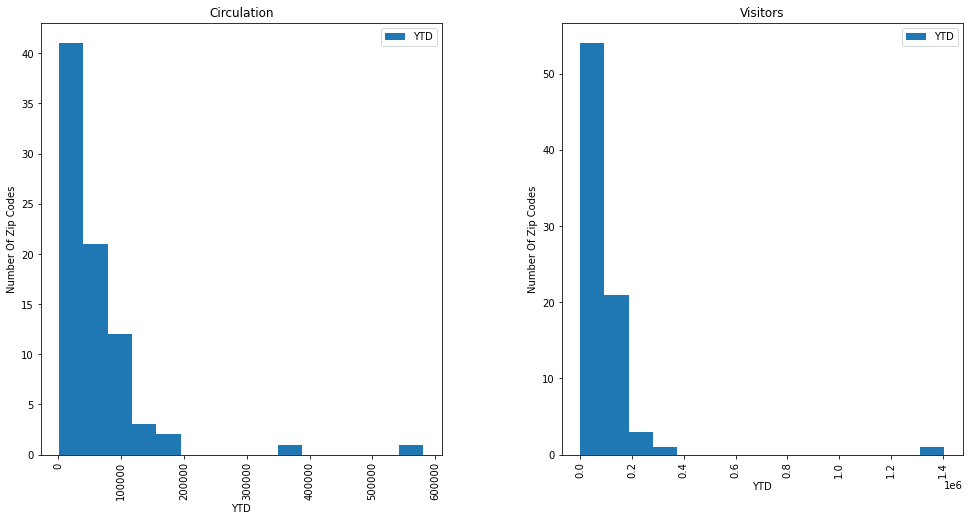

In [75]:
#  2019 Histograms - No Covid Data in 2019
histogram_2019 = chi_library_covid_2019.hist(column=('YTD'), by= 'TYPE', bins = 15, grid=False,
            figsize=(16, 8),
            legend=True)
for ax in histogram_2019.flatten():
    ax.set_xlabel("YTD")
    ax.set_ylabel("Number Of Zip Codes")


# plt.xlabel('YTD')
# plt.ylabel("Number Of Zip Codes");

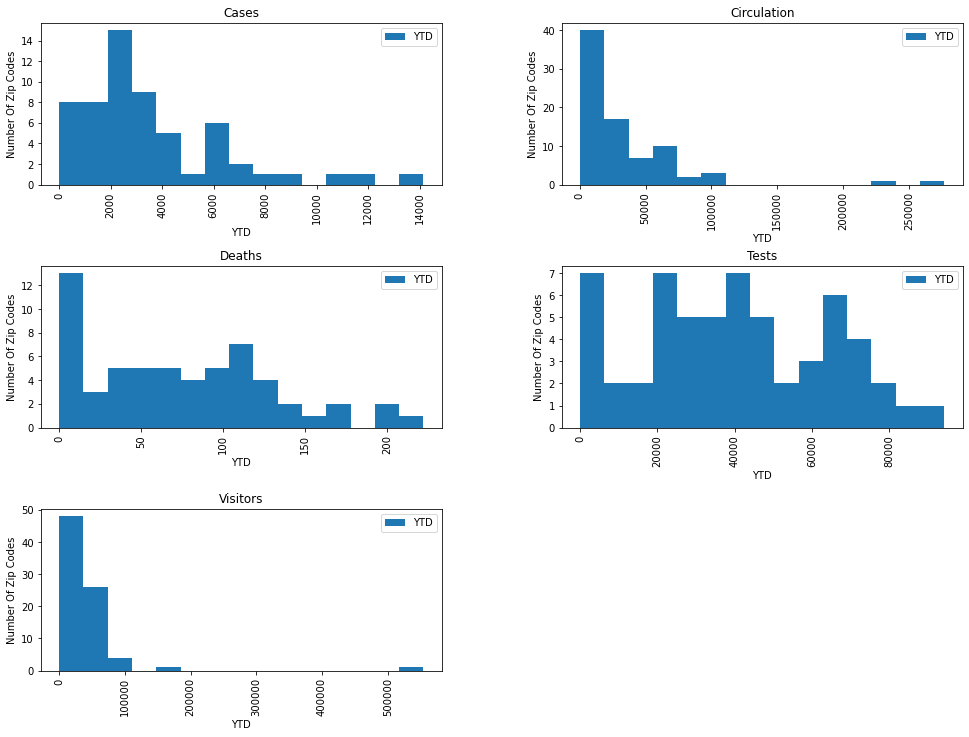

In [76]:
# 2020 Histograms
histogram_2020 = chi_library_covid_2020.hist(column=('YTD'), by= 'TYPE', bins = 15, grid=False,
        figsize=(16, 12),
        legend=True)
for ax in histogram_2020.flatten():
    ax.set_xlabel("YTD")
    ax.set_ylabel("Number Of Zip Codes")

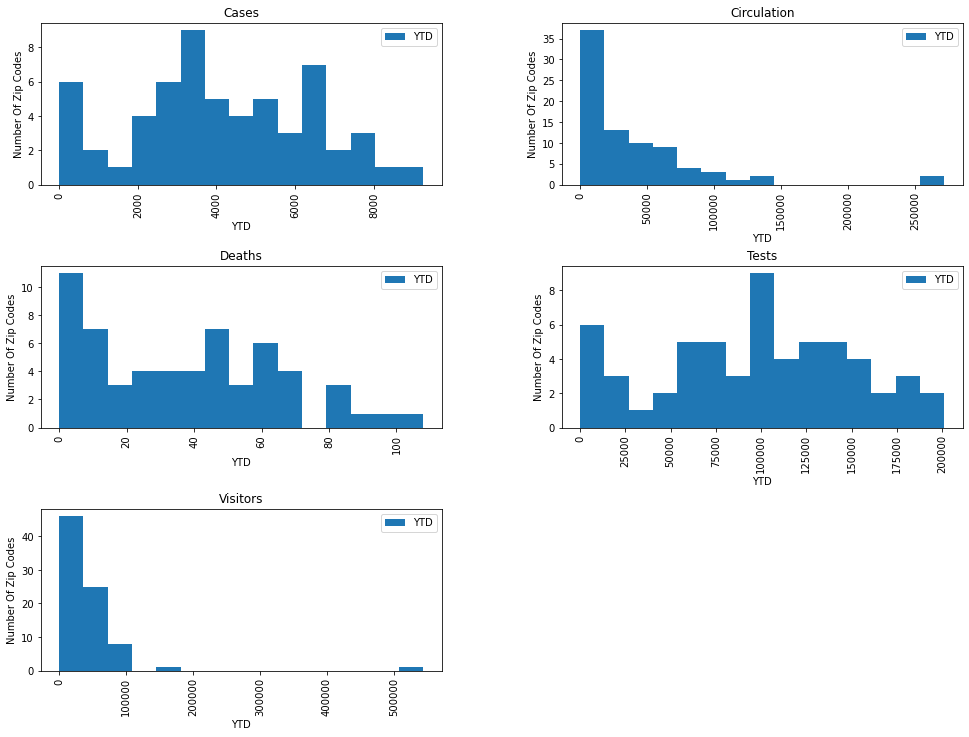

In [77]:
# 2021 Histograms
histogram_2021 = chi_library_covid_2021.hist(column=('YTD'), by= 'TYPE', bins = 15, grid=False,
        figsize=(16, 12),
        legend=True)
for ax in histogram_2021.flatten():
    ax.set_xlabel("YTD")
    ax.set_ylabel("Number Of Zip Codes")

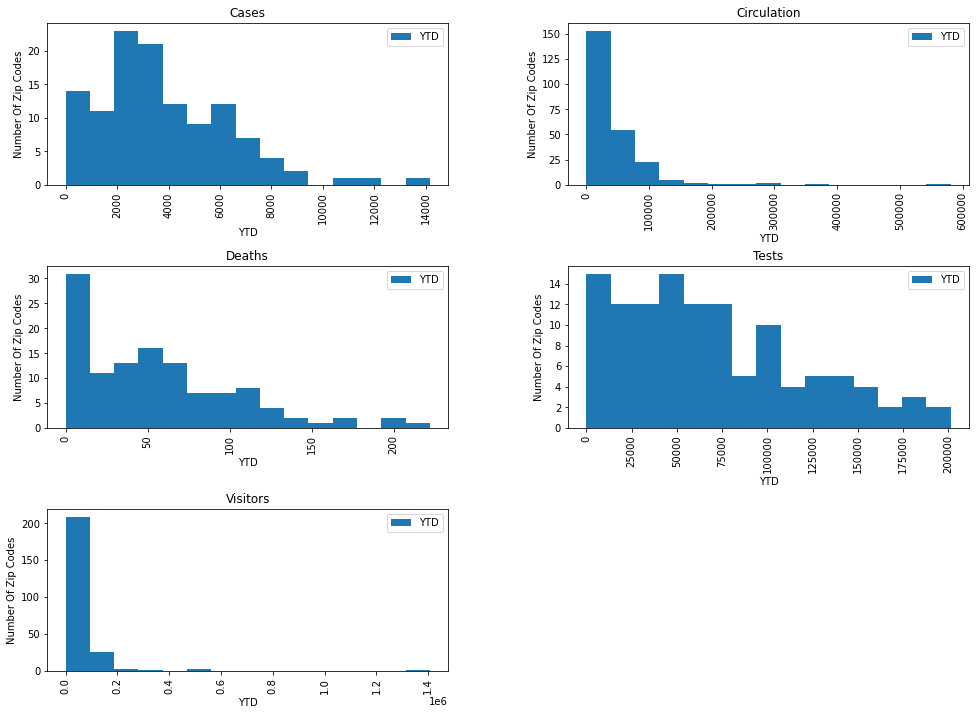

In [78]:
# All data histograms
histogram_all = chi_library_covid.hist(column=('YTD'), by= 'TYPE', bins = 15, grid=False,
        figsize=(16, 12),
        legend=True)
for ax in histogram_all.flatten():
    ax.set_xlabel("YTD")
    ax.set_ylabel("Number Of Zip Codes")